In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# read csv file
df = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

# drop rows where there's no number in column named 'value'
df.dropna()

# retrieve index for which column named 'value' is negative
index_neg = df[df['value'] < 0].index

# drop those indexes
df.drop(index_neg, inplace=True)

display(df)

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [2]:
def timechange(df):
    df["time"] = pd.to_datetime(df["time"])
    df["hour"] = df["time"].dt.hour
    df["time"] = df["time"].dt.date

    return df
df = timechange(df)
display(df)

,id,time,variable,value,hour
1,AS14.01,2014-02-26,mood,6.000,13
2,AS14.01,2014-02-26,mood,6.000,15
3,AS14.01,2014-02-26,mood,6.000,18
4,AS14.01,2014-02-26,mood,7.000,21
5,AS14.01,2014-02-27,mood,6.000,9
...,...,...,...,...,...
2770399,AS14.30,2014-04-11,appCat.weather,8.032,7
2772465,AS14.30,2014-04-19,appCat.weather,3.008,11
2774026,AS14.30,2014-04-26,appCat.weather,7.026,10
2774133,AS14.30,2014-04-27,appCat.weather,23.033,0


In [4]:
# create df with statistical values from csv 
def features(df):
    # create list in order to store values in for loop
    base_stats = []
    # loop through rows of df
    for var in df.variable.unique(): # var are the distinct features in the column named 'variable'
        subsetseries = df[df["variable"] == var].value # subsetseries are the numbers given in column named 'value'
        description_dict = subsetseries.describe().round(2).to_dict() # description_dict is returning a dict consisting of count, mean, std, min, 25%, 50%, 75%, and max values          
        description_dict['trimmed mean'] = stats.trim_mean(subsetseries, 0.05) 
        description_dict["variable"] = var
        base_stats.append(description_dict)
    # create new df
    base_stats_df = pd.DataFrame(base_stats)
    base_stats_df = base_stats_df.set_index("variable")

    return base_stats_df
print(features(df))

                        count    mean     std   min    25%    50%     75%  \
variable                                                                    
mood                   5641.0    6.99    1.03  1.00   7.00   7.00    8.00   
circumplex.arousal     3464.0    0.61    0.61  0.00   0.00   1.00    1.00   
circumplex.valence     5167.0    0.80    0.51  0.00   0.00   1.00    1.00   
activity              22965.0    0.12    0.19  0.00   0.00   0.02    0.16   
screen                96578.0   75.34  253.82  0.04   5.32  20.04   62.54   
call                   5239.0    1.00    0.00  1.00   1.00   1.00    1.00   
sms                    1798.0    1.00    0.00  1.00   1.00   1.00    1.00   
appCat.builtin        91285.0   19.45  312.91  0.00   2.02   4.04    9.92   
appCat.communication  74276.0   43.34  128.91  0.01   5.22  16.23   45.48   
appCat.entertainment  27124.0   37.58  262.97  0.00   1.33   3.39   14.92   
appCat.finance          939.0   21.76   39.22  0.13   4.07   8.03   20.16   

In [5]:
# def aggr_features(values):
    
#     if 'appCat' in values:
#         values = 'appCatt.values'
#         # print(values)
#     elif 'circumplex' in values:
#         values = 'circumplex.values'
#     return values

# create df with statistical values from csv when appCat and circumplex values are summed
def features_aggr(df, aggr_features=False):

    # df['variable'] = df.apply(aggr_features, axis=1)

    # sum values for appCat and circumplex variables
    if aggr_features:
        df['variable'] = df['variable'].apply(lambda x: 'appCat.values' if 'appCat' in x else x)
        df['variable'] = df['variable'].apply(lambda x: 'circumplex.values' if 'circumplex' in x else x)

    # create list in order to store values in for loop
    base_stats = []

    # loop through rows of df
    for var in df.variable.unique(): # var are the distinct features in the column named 'variable'
        subsetseries = df[df["variable"] == var].value # subsetseries are the numbers given in column named 'value'
        description_dict = subsetseries.describe().round(2).to_dict() # description_dict is returning a dict consisting of count, mean, std, min, 25%, 50%, 75%, and max values          
        description_dict['trimmed mean'] = stats.trim_mean(subsetseries, 0.05) 
        description_dict["variable"] = var
        base_stats.append(description_dict)

    # create a new df
    base_stats_df = pd.DataFrame(base_stats)
    base_stats_df = base_stats_df.set_index("variable")

    return base_stats_df
print(features_aggr(df, aggr_features=True))


                      count   mean     std   min   25%    50%    75%  \
variable                                                               
mood                 5641.0   6.99    1.03  1.00  7.00   7.00   8.00   
circumplex.values    8631.0   0.72    0.56  0.00  0.00   1.00   1.00   
activity            22965.0   0.12    0.19  0.00  0.00   0.02   0.16   
screen              96578.0  75.34  253.82  0.04  5.32  20.04  62.54   
call                 5239.0   1.00    0.00  1.00  1.00   1.00   1.00   
sms                  1798.0   1.00    0.00  1.00  1.00   1.00   1.00   
appCat.values      233401.0  34.59  253.03  0.00  3.01   7.04  25.50   

                        max  trimmed mean  
variable                                   
mood                  10.00      7.033090  
circumplex.values      2.00      0.723054  
activity               1.00      0.090174  
screen              9867.01     41.731878  
call                   1.00      1.000000  
sms                    1.00      1.000000  

In [16]:
# for var in df.iterrows():
#     if var['variable'] == 'mood':
#         print(var)

# trying out to 
for var in df.time.unique():
    print(var)
#     mood_days = []
#     no_mood_days = []
#     if df[df["variable"] == 'mood'].value:
#         mood_days.append({df['id']: df['value']})
#     else:
#         no_mood_days.append({df['id']: df['value']})

    
# print(mood_days)
# print(no_mood_days)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
# for val in df.id.unique:
# display(df.isnull().iloc[0:500000, :])
# pd.set_option('display.max_rows', None)
display(df[df['value'].isnull()])

# display(df if df['variable'] = circumplex.values)

# display(df.loc[df['variable'] == 'circumplex.values'])


,id,time,variable,value,hour
5709,AS14.01,2014-04-02,circumplex.values,NaN,18
5731,AS14.01,2014-04-07,circumplex.values,NaN,15
5773,AS14.01,2014-04-16,circumplex.values,NaN,12
5797,AS14.01,2014-04-21,circumplex.values,NaN,13
5836,AS14.01,2014-04-29,circumplex.values,NaN,9
6325,AS14.05,2014-04-01,circumplex.values,NaN,19
6379,AS14.05,2014-04-13,circumplex.values,NaN,13
6434,AS14.05,2014-04-24,circumplex.values,NaN,18
6668,AS14.06,2014-05-02,circumplex.values,NaN,10
6793,AS14.07,2014-04-12,circumplex.values,NaN,0


In [17]:
pd.set_option('display.max_rows', None)
ds_filtered = ds[(ds['id'] == 'AS14.01') & (ds['variable'] == 'mood')]
display(ds_filtered)


,id,time,variable,value,hour
1,AS14.01,2014-02-26,mood,6.0,0
2,AS14.01,2014-02-26,mood,6.0,0
3,AS14.01,2014-02-26,mood,6.0,0
4,AS14.01,2014-02-26,mood,7.0,0
5,AS14.01,2014-02-27,mood,6.0,0
6,AS14.01,2014-02-27,mood,6.0,0
7,AS14.01,2014-02-27,mood,7.0,0
8,AS14.01,2014-03-21,mood,6.0,0
9,AS14.01,2014-03-21,mood,6.0,0
10,AS14.01,2014-03-21,mood,7.0,0


In [2]:
%run eda_rinus.py

Number of unique users: 27

List of unique users: AS14.01, AS14.02, AS14.03, AS14.05, AS14.06, AS14.07, AS14.08, AS14.09, AS14.12, AS14.13, AS14.14, AS14.15, AS14.16, AS14.17, AS14.19, AS14.20, AS14.23, AS14.24, AS14.25, AS14.26, AS14.27, AS14.28, AS14.29, AS14.30, AS14.31, AS14.32, AS14.33

                        count    mean     std       min    25%    50%     75%  \
variable                                                                        
mood                   5641.0    6.99    1.03      1.00   7.00   7.00    8.00   
circumplex.arousal     5597.0   -0.10    1.05     -2.00  -1.00   0.00    1.00   
circumplex.valence     5487.0    0.69    0.67     -2.00   0.00   1.00    1.00   
activity              22965.0    0.12    0.19      0.00   0.00   0.02    0.16   
screen                96578.0   75.34  253.82      0.04   5.32  20.04   62.54   
call                   5239.0    1.00    0.00      1.00   1.00   1.00    1.00   
sms                    1798.0    1.00    0.00      1.00   1

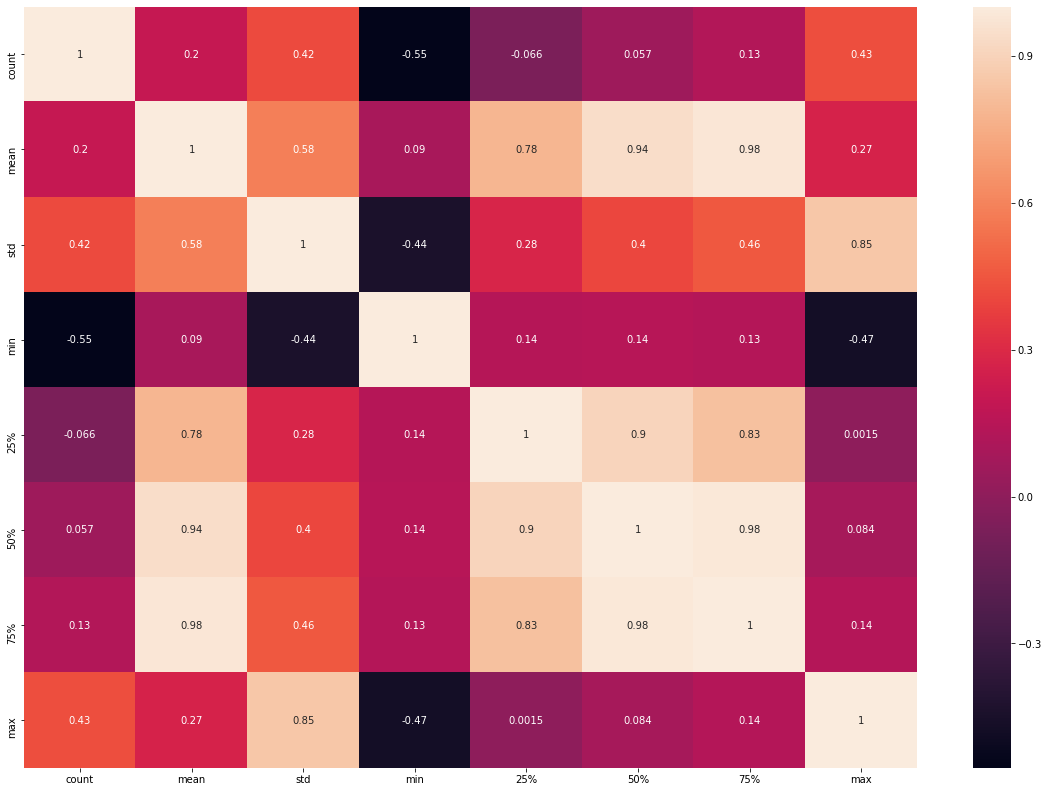

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# unique_users = df.id.unique()

# display(corr_result)

def corr_data_get(df):
    base_stats = []

    for var in df.variable.unique():
        subsetseries = df[df["variable"] == var].value
        description_dict = subsetseries.describe().round(2).to_dict()
        description_dict["variable"] = var
        base_stats.append(description_dict)

    base_stats_df = pd.DataFrame(base_stats)
    return base_stats_df

corresult = corr_data_get(df)
# corr = corr_data_get.corr(method='pearson')
# sns.heatmap(corr)

axis = plt.subplots(figsize=(20,14))
sns.heatmap(corresult.corr(),annot = True)
plt.show()

In [30]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.
